# 28회 ADP 복원 

packages

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display , HTML
display(HTML("<style>.container {width :95% !important;}</style>"))

from scipy.stats import chi2_contingency
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , classification_report

import warnings 
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


import time
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy.stats import mannwhitneyu
import pingouin as pg

ImportError: cannot import name 'Self' from 'typing_extensions' (C:\Users\235ju\anaconda3\lib\site-packages\typing_extensions.py)

In [2]:
!pip install lifelines

  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/cc/95/35190b276a598b640e04e96bcee19362884835c01994db7323d443017e60/lifelines-0.27.8-py3-none-any.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/ae/f0/ff275c0009f0037c381c6e3a94049b9792df7d7f437c5ccd0c7aefca5f22/formulaic-0.6.6-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.2.0 from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 350.7/35

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
tensorflow-gpu 2.5.0 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
tensorflow-gpu 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.8.0 which is incompatible.
tensorflow-intel 2.11.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.5.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pingouin

     -------------------------------------- 198.6/198.6 kB 6.1 MB/s eta 0:00:00
  Obtaining dependency information for pandas-flavor>=0.2.0 from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=5f5443cfdc969a10d7fc8eb981a329e673550075de7c96f98dde173644513429
  Stored in directory: c:\users\235ju\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 기계학습 (50점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/dipam7/student-grade-prediction?resource=download 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv
- 데이터 설명 : 학생의 다양한 주변 환경에 따른 결석 등급 (absences)
    - sex : 성별 (F : 여성 / M :남성)
    - age : 나이
    - pstatus : 부모와 동거 유무 (T : 동거중 , A : 별거)
    - medu : 어머니 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5~9학년, 3 - 중등 교육 또는 4 - 고등 교육)
    - fedu : 아버지 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5 - 9학년, 3 - 중등 교육 또는 4 - 고등 교육)
    - guardian : 학생의 보호자
    - traveltime : 집에서 학교까지 이동 시간(1 - <15분, 2 - 15 - 30분, 3 - 30분 - 1시간, 또는 4 - >1시간)
    - studytime : 주간 학습 시간(1 - <2시간, 2 - 2 - 5시간, 3 - 5 - 10시간 또는 4 - >10시간)
    - failures : 과거 클래스 실패 수(n if 1<=n<3, 그렇지 않으면 4)
    - freetime : 방과 후 자유 시간(숫자: 1 - 매우 낮음에서 5 - 매우 높음)
    - famrel : 가족 관계의 질(숫자: 1 - 매우 나쁨에서 5 - 훌륭함)
    - absences : 학교 결석 횟수등급 (0~5, 높은 숫자일수록 많은 결석 횟수)

In [29]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv")
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,2
1,F,17,T,1,1,father,1,2,0,3,5,1
2,F,15,T,1,1,mother,1,2,3,3,4,3
3,F,15,T,4,2,mother,1,3,0,2,3,0
4,F,16,T,3,3,father,1,2,0,3,4,1


In [30]:
df.loc[df.absences >0,'absences_target'] = 1
df.loc[df.absences == 0,'absences_target'] = 0
df['absences_target'] = df['absences_target'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              395 non-null    object
 1   age              395 non-null    int64 
 2   pstatus          395 non-null    object
 3   medu             395 non-null    int64 
 4   fedu             395 non-null    int64 
 5   guardian         395 non-null    object
 6   traveltime       395 non-null    int64 
 7   studytime        395 non-null    int64 
 8   failures         395 non-null    int64 
 9   freetime         395 non-null    int64 
 10  famrel           395 non-null    int64 
 11  absences         395 non-null    int64 
 12  absences_target  395 non-null    int32 
dtypes: int32(1), int64(9), object(3)
memory usage: 38.7+ KB


## 1-1. EDA를 진행하고 (+시각화) , 차원축소의 필요성이 있는지 확인 (5점)

In [31]:
print('''
모든 컬럼에 결측치가 없으며 수치형 변수와 범주형 변수가 존재함을 알 수 있다.
''')
df.info()


모든 컬럼에 결측치가 없으며 수치형 변수와 범주형 변수가 존재함을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              395 non-null    object
 1   age              395 non-null    int64 
 2   pstatus          395 non-null    object
 3   medu             395 non-null    int64 
 4   fedu             395 non-null    int64 
 5   guardian         395 non-null    object
 6   traveltime       395 non-null    int64 
 7   studytime        395 non-null    int64 
 8   failures         395 non-null    int64 
 9   freetime         395 non-null    int64 
 10  famrel           395 non-null    int64 
 11  absences         395 non-null    int64 
 12  absences_target  395 non-null    int32 
dtypes: int32(1), int64(9), object(3)
memory usage: 38.7+ KB


In [32]:
print('''
수치형 변수의 n-percentile과 최대/최소값 등을 확인할 수 있다.
또한 각 변수의 전체적인 분포를 확인할 수 있었다.
''')
df.describe()


수치형 변수의 n-percentile과 최대/최소값 등을 확인할 수 있다.
또한 각 변수의 전체적인 분포를 확인할 수 있었다.



,age,medu,fedu,traveltime,studytime,failures,freetime,famrel,absences,absences_target
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.944304,1.377215,0.536709
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,0.896659,1.555076,0.499283
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,5.000000,3.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,1.000000


In [33]:
df.absences.unique()

array([2, 1, 3, 0, 4], dtype=int64)


이상치의 유무를 알아보기 위해 수치형 변수의 시각화를 진행하였다. 
시각화 결과, 이상치로 보이는 변수(age, traveltime, studytime,failures,freetime,famrel)를 찾았다.



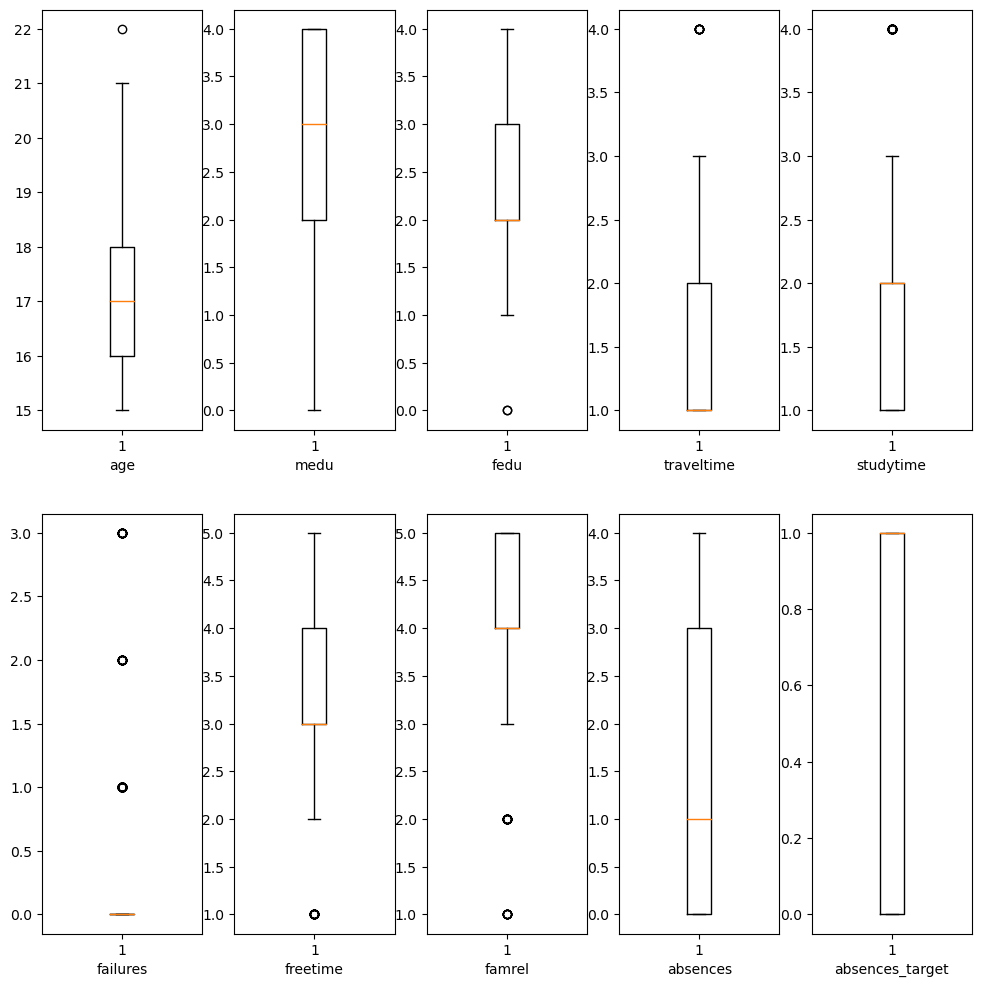

In [34]:
import matplotlib.pyplot as plt
print('''
이상치의 유무를 알아보기 위해 수치형 변수의 시각화를 진행하였다. 
시각화 결과, 이상치로 보이는 변수(age, traveltime, studytime,failures,freetime,famrel)를 찾았다.
''')
numeric = list(df.select_dtypes(exclude = object).columns)
fig, axes = plt.subplots(2, 5, figsize=(12,12))
for ax, col in zip(axes.ravel(), df[numeric]):
    if col in numeric:
        ax.boxplot(df[col])
        ax.set_xlabel(col)
plt.show()

In [35]:
for col in numeric:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    top = df[col].quantile(0.75)+ IQR*1.5
    down = df[col].quantile(0.25) - IQR*1.5
    df[col] = df[col].clip(down,top) #에러나면 df.clip(down,top)[col]
    

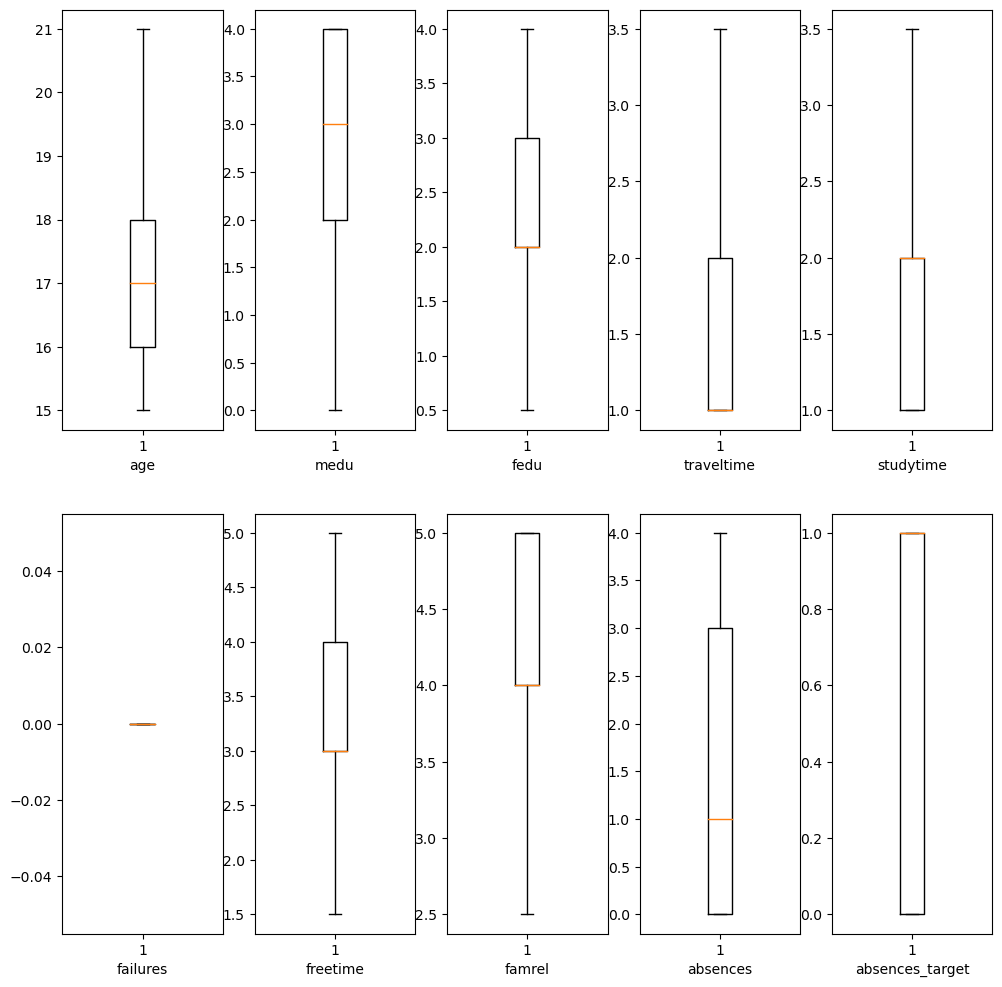

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(12,12))
for ax, col in zip(axes.ravel(), df[numeric]):
    if col in numeric:
        ax.boxplot(df[col])
        ax.set_xlabel(col)
plt.show()

In [37]:
print('차원축소가 필요하지 않아 보임')

차원축소가 필요하지 않아 보임


In [38]:
print(numeric)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'famrel', 'absences', 'absences_target']


## 1-2. 데이터 품질 개선을 위한 방법이 있는지 찾고 데이터셋을 재생성하라 (5점)

In [39]:
print('''
데이터를 표준화하는 방법으로 머신러닝의 성능을 올릴 수 있을 것 같다.
아래와 같이 데이터 표준화를 진행하여 데이터셋을 재생성하였다.
''')
numeric = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'famrel', 'absences']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])
df


데이터를 표준화하는 방법으로 머신러닝의 성능을 올릴 수 있을 것 같다.
아래와 같이 데이터 표준화를 진행하여 데이터셋을 재생성하였다.



,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences,absences_target
0,F,1.032798,A,1.143856,1.364705,mother,0.848677,-0.001656,0.0,-0.273664,0.003300,0.400993,1
1,F,0.242187,T,-1.600009,-1.409181,father,-0.661356,-0.001656,0.0,-0.273664,1.306735,-0.242878,1
2,F,-1.339034,T,-1.600009,-1.409181,mother,-0.661356,-0.001656,0.0,-0.273664,0.003300,1.044864,1
3,F,-1.339034,T,1.143856,-0.484552,mother,-0.661356,1.306707,0.0,-1.328273,-1.300135,-0.886749,0
4,F,-0.548424,T,0.229234,0.440077,father,-0.661356,-0.001656,0.0,-0.273664,0.003300,-0.242878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,2.614019,A,-0.685387,-0.484552,other,-0.661356,-0.001656,0.0,1.835554,1.306735,1.688735,1
391,M,0.242187,T,0.229234,-1.409181,mother,0.848677,-1.310019,0.0,0.780945,-1.951853,-0.242878,1
392,M,3.404629,T,-1.600009,-1.409181,other,-0.661356,-1.310019,0.0,1.835554,1.306735,-0.242878,1
393,M,1.032798,T,0.229234,-0.484552,mother,2.358710,-1.310019,0.0,0.780945,0.003300,-0.886749,0


## 1-3. 1.2에서 제시한 방법이 데이터 과적합이 된다는 가정하에 어떻게 해결할 수 있을지 2가지 개선안 제시, 각방법들의 장단점 기술 (10점)

In [40]:
'''
과적합(Overfitting)은 머신러닝 모델이 훈련 데이터에 너무 많이 적응하여 테스트 데이터에서 성능이 떨어지는 현상을 나타냅니다. 이러한 문제를 해결하기 위한 다양한 방법이 있으며, 여기에는 2가지 주요한 방법과 각각의 장단점을 설명하겠습니다:

교차 검증 (Cross-Validation):

장점:
모델의 일반화 성능을 더 정확하게 평가할 수 있음.
과적합을 탐지하고 모델을 조정할 수 있는 피드백 제공.
모델의 안정성을 향상시킴.
단점:
계산 비용이 높을 수 있음.
데이터의 크기가 작을 때는 교차 검증이 정확하게 동작하기 어려울 수 있음.
규제 (Regularization):

장점:
모델의 복잡성을 감소시켜 과적합을 방지함.
특정 가중치를 축소시켜 변수 선택을 돕고, 노이즈를 제거함.
단점:
적절한 규제 하이퍼파라미터를 선택해야 함.
과소적합(Underfitting) 가능성이 있음.
'''

'\n과적합(Overfitting)은 머신러닝 모델이 훈련 데이터에 너무 많이 적응하여 테스트 데이터에서 성능이 떨어지는 현상을 나타냅니다. 이러한 문제를 해결하기 위한 다양한 방법이 있으며, 여기에는 2가지 주요한 방법과 각각의 장단점을 설명하겠습니다:\n\n교차 검증 (Cross-Validation):\n\n장점:\n모델의 일반화 성능을 더 정확하게 평가할 수 있음.\n과적합을 탐지하고 모델을 조정할 수 있는 피드백 제공.\n모델의 안정성을 향상시킴.\n단점:\n계산 비용이 높을 수 있음.\n데이터의 크기가 작을 때는 교차 검증이 정확하게 동작하기 어려울 수 있음.\n규제 (Regularization):\n\n장점:\n모델의 복잡성을 감소시켜 과적합을 방지함.\n특정 가중치를 축소시켜 변수 선택을 돕고, 노이즈를 제거함.\n단점:\n적절한 규제 하이퍼파라미터를 선택해야 함.\n과소적합(Underfitting) 가능성이 있음.\n'

## 2-1. 1-2 데이터셋을 기준으로 random forest, neural network , lightgbm 3가지 방식으로 학교 결석 횟수등급을 예측하는 모델을 만들어라, f1 score로 모델을 평가하라 (5점)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성과 타겟 분리
X = df.drop(columns=['absences','absences_target'])
y = df['absences_target'].astype('int')

from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 라벨 인코딩
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
label_encoder2 = LabelEncoder()
X['pstatus'] = label_encoder2.fit_transform(X['pstatus'])
label_encoder3 = LabelEncoder()
X['guardian'] = label_encoder3.fit_transform(X['guardian'])

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# Random Forest 모델
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Neural Network 모델
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_f1 = f1_score(y_test, nn_predictions, average='weighted')

# LightGBM 모델
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_f1 = f1_score(y_test, lgb_predictions, average='weighted')

#XGBoost 모델
model = XGBClassifier(random_state=11)
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 171, number of negative: 145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541139 -> initscore=0.164930
[LightGBM] [Info] Start training from score 0.164930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

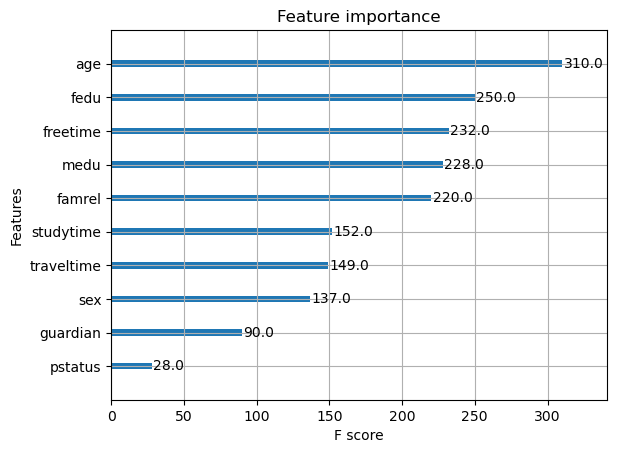

In [42]:

from xgboost import plot_importance

plot_importance(model, max_num_features=20)

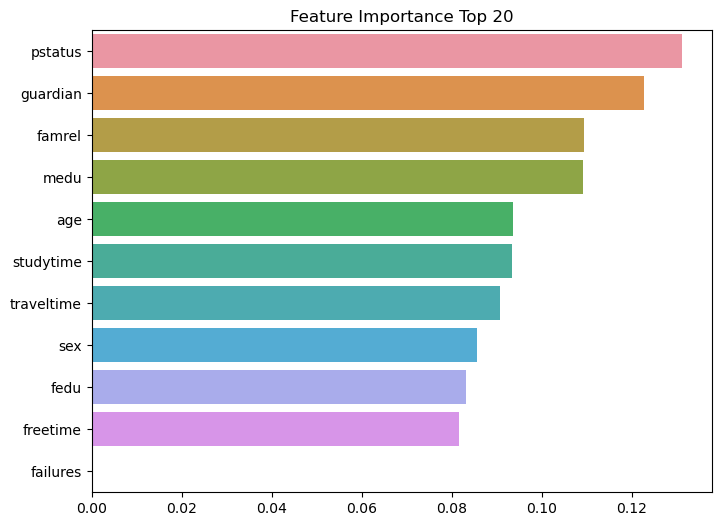

In [44]:
#XGBoost 모델
model = XGBClassifier(random_state=11)
model.fit(X_train, y_train)

import seaborn as sns
# 배열형태로 반환
ft_importance_values = model.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [146]:
print(f"F1 Score for Random Forest: {rf_f1}")
print(f"F1 Score for Neural Network: {nn_f1}")
print(f"F1 Score for LightGBM: {lgb_f1}")


F1 Score for Random Forest: 0.5444498539435249
F1 Score for Neural Network: 0.48018054769109625
F1 Score for LightGBM: 0.5317957554244475


## 2-2. hard voting, soft voting에 대한 장단점을 설명하고 2-1의 3가지 모델로 구현하라. 두 방식의 f1-score를 비교하라 (10점)

In [148]:
'''Hard Voting:

장점:
각 모델의 예측을 다수결로 결정하므로 모델의 다양성을 활용하여 안정적인 예측을 할 수 있음.
모델 간에 독립적인 오차가 있는 경우 효과적.
단점:
모든 모델이 동일한 가중치로 고려되므로 성능이 높은 모델과 성능이 낮은 모델의 가중치가 동일하게 적용됨.
Soft Voting:

장점:
모델 예측의 확률 값을 평균하므로 모델의 예측 신뢰도를 고려함.
확률 값 기반의 가중 평균을 사용하므로 성능이 높은 모델에 높은 가중치를 부여할 수 있음.
단점:
각 모델이 예측 확률을 제공해야 하며, 확률 값을 계산하는 모델에 적합함.
'''

'Hard Voting:\n\n장점:\n각 모델의 예측을 다수결로 결정하므로 모델의 다양성을 활용하여 안정적인 예측을 할 수 있음.\n모델 간에 독립적인 오차가 있는 경우 효과적.\n단점:\n모든 모델이 동일한 가중치로 고려되므로 성능이 높은 모델과 성능이 낮은 모델의 가중치가 동일하게 적용됨.\nSoft Voting:\n\n장점:\n모델 예측의 확률 값을 평균하므로 모델의 예측 신뢰도를 고려함.\n확률 값 기반의 가중 평균을 사용하므로 성능이 높은 모델에 높은 가중치를 부여할 수 있음.\n단점:\n각 모델이 예측 확률을 제공해야 하며, 확률 값을 계산하는 모델에 적합함.\n'

In [147]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# 모델 생성
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
lgb_model = lgb.LGBMClassifier()

# Hard Voting
hard_voting = VotingClassifier(estimators=[('rf', rf_model), ('nn', nn_model), ('lgb', lgb_model)], voting='hard')
hard_voting.fit(X_train, y_train)
hard_voting_predictions = hard_voting.predict(X_test)
hard_voting_f1 = f1_score(y_test, hard_voting_predictions, average='weighted')

# Soft Voting
soft_voting = VotingClassifier(estimators=[('rf', rf_model), ('nn', nn_model), ('lgb', lgb_model)], voting='soft')
soft_voting.fit(X_train, y_train)
soft_voting_predictions = soft_voting.predict(X_test)
soft_voting_f1 = f1_score(y_test, soft_voting_predictions, average='weighted')



[LightGBM] [Info] Number of positive: 171, number of negative: 145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541139 -> initscore=0.164930
[LightGBM] [Info] Start training from score 0.164930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [149]:
print(f"F1 Score for Hard Voting: {hard_voting_f1}")
print(f"F1 Score for Soft Voting: {soft_voting_f1}")


F1 Score for Hard Voting: 0.5168122199326203
F1 Score for Soft Voting: 0.5697581953911067


## 2-3. 총 5개 모델(RF, NN, LGBM, 하드보팅, 소프트보팅) 중 실시간 온라인 시스템에 가장 적합한 모델과 선정이유를 객관적으로 제시하라 (5점)

In [150]:
'''
f1score에 근거하여 soft보팅이 가장 적합함을 알 수 있다
'''


'\nf1score에 근거하여 soft보팅이 가장 적합함을 알 수 있다\n'

## 3-1. 적정 모델과 선정 및 모델링 과정에서 추가적으로 고려해볼 만한 사항은? (5점)

In [151]:
'''하이퍼파라미터 튜닝: 
모델의 하이퍼파라미터를 조정하여 최적의 모델을 찾는 것을 고려해볼 수 있다.
교차 검증을 활용하여 하이퍼파라미터 튜닝을 수행할 수 있다
'''

'하이퍼파라미터 튜닝: \n모델의 하이퍼파라미터를 조정하여 최적의 모델을 찾는 것을 고려해볼 수 있다.\n교차 검증을 활용하여 하이퍼파라미터 튜닝을 수행할 수 있다\n'

## 3-2. 모델을 학교 시스템에 적용하여 활용하려한다. 모델 적용 및 운영과정에서 고려해볼 만한 사항? (5점)

# 통계 (50점)

# 4번 데이터
- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv
- status : 생존 여부 (death: 죽음 / event lost: 생존)
- company : 회사구분

In [286]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv')
df.head()

,time(month),status,company
0,1,event lost,X
1,2,event lost,X
2,3,event lost,X
3,4,event lost,X
4,5,event lost,X


## 4-1 Kaplan Meier 방법 사용 생존분석 수행. 회사부품별 25, 35, 45 개월에서의 생존 확률 (소숫점 3자리 ,5점)

## 4-2 두 회사간 생존시간 차이를 log-rank 방식으로 검정하시오. 가설설정, 통계량, 귀무가설 기각여부 판단(10점)

# 5번 데이터
- 데이터 url: https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p5_.csv 
- data형식
    - 한 유저가 시식 전 물건 구매의사 유,무와 시식 후 구매의사 유,무에 대한 응답을 나타낸 데이터
    - {시식전} _ {구매의사 유 or 무} __ {시식후} _ {구매의사 유 or 무}


In [79]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p5_.csv')
df.head()

,data,userId
0,시식전_유__시식후_유,user_1
1,시식전_유__시식후_유,user_2
2,시식전_유__시식후_유,user_3
3,시식전_유__시식후_유,user_4
4,시식전_유__시식후_유,user_5


## 5-1 시식여부가 구매의사에 영향을 주는지 가설을 설정하시오(5점)

In [83]:
print('귀무가설 : 시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 없다')
print('대립가설 : 시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 있다')

귀무가설 : 시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 없다
대립가설 : 시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 있다


## 5-2 검정하고 결과를 분석하시오(5점)

In [82]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 프레임 생성
data = ['시식전_유__시식후_유', '시식전_유__시식후_무', '시식전_무__시식후_유', '시식전_무__시식후_무']
df = pd.DataFrame(data, columns=['시식여부_구매의사'])

# 크로스테이블 생성
cross_table = pd.crosstab(index=df['시식여부_구매의사'], columns='count')

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(cross_table)

# 결과 출력
print(f"카이제곱 값: {chi2}")
print(f"p-값: {p}")

# 유의수준 설정
alpha = 0.05

# p-값을 기준으로 유의수준과 비교
if p < alpha:
    print("시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 없습니다.")


카이제곱 값: 0.0
p-값: 1.0
시식 여부와 구매의사 간에는 통계적으로 유의한 관련성이 없습니다.


# 6번 데이터
- 데이터 url: https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p6.csv 

## 6-1 A,B 지역 학생의 점수에 차이가 있는지 가설을 설정하고 정하시오 (10점)

In [25]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p6.csv')
df.head()
df.dropna(inplace = True)

In [35]:
print('귀무가설: A,B 지역별 학생의 점수에 차이가 없다')
print('대립가설: A,B 지역별 학생의 점수에 유의미한 차이가 있다.')

print(stats.ttest_ind(df[df.school_name == 'A'].score, df[df.school_name == 'B'].score))

print('pvalue가 0.05보다 작으므로 대립가설 채택')

귀무가설: A,B 지역별 학생의 점수에 차이가 없다
대립가설: A,B 지역별 학생의 점수에 유의미한 차이가 있다.
Ttest_indResult(statistic=-2.4539967706746957, pvalue=0.021139744907273616)
pvalue가 0.05보다 작으므로 대립가설 채택


# 7번 데이터
- 데이터 출처 : https://www.kaggle.com/datasets/hangawqadir/erbil-heart-disease-dataset
- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv
- 연령, 몸무게,콜레스테롤 수치 데이터

In [6]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv')
df.head()

,age,Cholesterol,weight
0,65,69.0,111.0
1,54,117.0,81.0
2,61,86.2,72.0
3,57,76.0,78.0
4,62,160.0,61.0


## 7-1 몸무게를 제어한다고 생각하고,  나이와 콜레스테롤 상관계수 및 유의확률 구하라(10점)

In [11]:
from scipy import stats
#상관계수와 유의확률
stats.pearsonr(x = df['age'], y= df['Cholesterol'])

PearsonRResult(statistic=-0.14405018650544685, pvalue=0.00847519497783225)

## 7-2 상관계수를 유의수준 0.05하에서 검정하라 (5점)

In [14]:
print(stats.pearsonr(x = df['age'], y= df['Cholesterol']).pvalue)
print('0.05보다 작으므로 유의한 관계임을 알 수 있음')

0.00847519497783225
0.05보다 작으므로 유의한 관계임을 알 수 있음


끝. 7페이지